# Data Science Bootcamp
# <center> **Aula 11 -- Distributions**

# Random Variables

In this tutorial we will explore how to generate random variables, with some known distribution.

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uniform Distribution

The uniform distributions is one of the most used distributions, it is used to construct any other distribution in terms of the Integral Formula Theorem. It characterizes by the fact that it has constant density function over a limited interval (continuous of discrete) $f(x) = c$.

As a consequence, it as a distribution function of the form $F(x) = x$.

In [2]:
# uniform distribution on the interval (0,1)
a = np.random.rand(200)

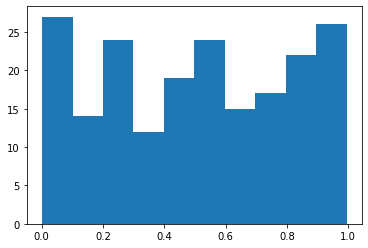

In [3]:
plt.figure()
plt.hist(a, bins=10)
plt.show()

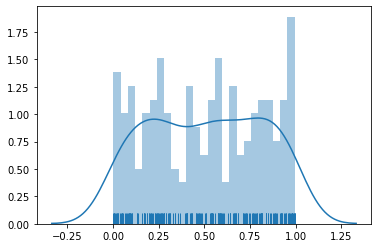

In [4]:
plt.figure()
sns.distplot(a, bins=25, hist=True, kde=True, rug=True)
plt.show()

## Uniform Distribution in other intervals

In [5]:
# uniform distribution on the interval (5,22)
lo = 5.
up = 22.
a = lo + (up - lo)*np.random.rand(1000)

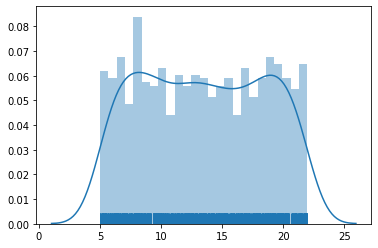

In [6]:
plt.figure()
sns.distplot(a, bins=25, hist=True, kde=True, rug=True)
plt.show()

We compare the teorethical expected value, with the empirical expected value:

In [7]:
print('Theoretical expected value:', (up+lo)/2.)
print('Empirical expected value:  ', a.mean())

Theoretical expected value: 13.5
Empirical expected value:   13.442281697661983


In [8]:
Nexp = 10000
n = 1000

means = np.zeros(Nexp)
for i in range(0, Nexp):
    means[i] = (lo + (up-lo)*np.random.rand(n)).mean()

In [9]:
#np.round(means,2)

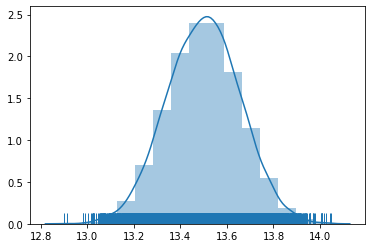

In [10]:
plt.figure()
sns.distplot(means, bins=15, kde=True, rug=True)
plt.show()

In [11]:
means.mean()

13.499597737096328

## Discrete distributions

#### Uniform

In [12]:
# uniform distribution on the set of k elements (0,1,2,...,k-1)
k = 6
a = np.random.choice(k, 1000)

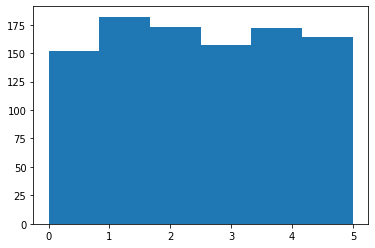

In [13]:
plt.figure()
plt.hist(a, bins=k)
plt.show()

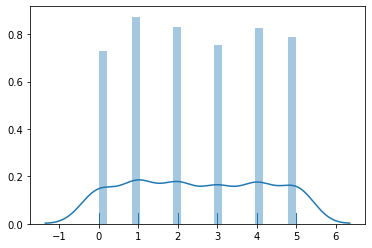

In [14]:
plt.figure()
sns.distplot(a, bins=24, kde=True, rug=True)
plt.show()

#### Discrete distribution with given probabilities

In [15]:
p = [0.1, 0.2, 0.15, 0.3, 0.05, 0.2]
k = len(p)

In [16]:
a = np.random.rand(1000)

In [17]:
def DiscreteDistribution(a, p):
    n = len(a)
    k = len(p)
    cs = np.array(p).cumsum()
    dist = np.zeros(n).astype(int)
    for i in range(0, n):
        dist[i] = np.argmax(a[i] <= cs)
    return dist

In [18]:
b = DiscreteDistribution(a, p)

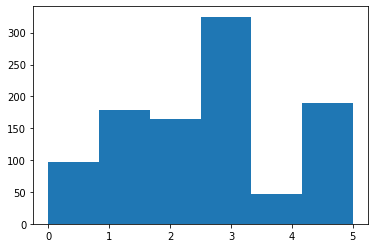

In [19]:
plt.figure()
plt.hist(b, bins=k)
plt.show()

In [20]:
n = len(b)
for i in range(0, k):
    print('probability of class {}: {}'.format(i, (b==i).sum()/n))

probability of class 0: 0.097
probability of class 1: 0.179
probability of class 2: 0.164
probability of class 3: 0.325
probability of class 4: 0.046
probability of class 5: 0.189


In [21]:
prob = [0.1, 0.2, 0.15, 0.3, 0.05, 0.2]

In [22]:
# uniform distribution on the set of k elements (0,1,2,...,k-1)
k = 6
a = np.random.choice(k, p=prob, size=(1000))

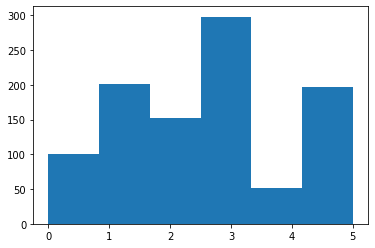

In [23]:
plt.figure()
plt.hist(a, bins=k)
plt.show()

In [24]:
n = len(a)
for i in range(0, k):
    print('probability of class {}: {}'.format(i, (a==i).sum()/n))

probability of class 0: 0.1
probability of class 1: 0.201
probability of class 2: 0.152
probability of class 3: 0.298
probability of class 4: 0.052
probability of class 5: 0.197


#### Bernoulli Distribution

In [25]:
a = np.random.choice(2, p=[0.9,0.1], size=(100))

In [26]:
a

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [27]:
b = np.random.binomial(1, p=0.1, size=(5,25))

In [28]:
b

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
        0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0]])

Bernoulli variables are used to indicate selections or chosing of random elements over a set.

In [29]:
x = np.arange(0,100)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [30]:
#seed = 2021
#np.random.seed(seed)

idx = np.random.choice(2, p=[0.85,0.15], size=x.shape[0])
#idx

In [31]:
x[idx==1]

# [4, 12, 17, 27, 32, 37, 39, 44, 46, 50, 59, 67, 75, 84, 87, 88, 90, 93]

array([ 5, 13, 22, 28, 30, 39, 41, 44, 48, 50, 54, 76, 78, 84, 93])

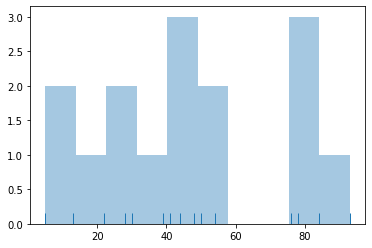

In [32]:
plt.figure()
sns.distplot(x[idx==1], bins=10, rug=True, kde=False)
plt.show()

In [33]:
A = np.random.choice(2, p=[0.5,0.5], size=(28,28))
A

array([[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
        1, 0, 1, 1, 1, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 0, 1],
       [1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
        1, 0, 1, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 0, 1],
       [0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
        1, 0, 1, 0, 1, 1],
       [1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 

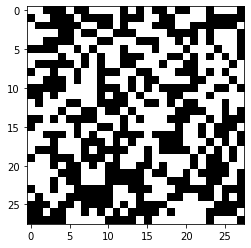

In [34]:
plt.figure()
plt.imshow(A, cmap='gray')
plt.show()

#### Binomial Distribution

In [35]:
a = np.random.binomial(10, p=.25, size=(1000,))

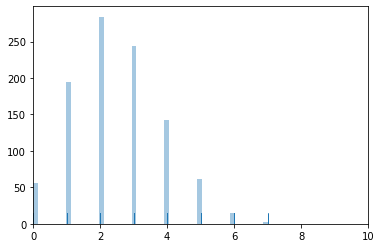

In [36]:
plt.figure()
sns.distplot(a, bins=50, kde=False, rug=True)
plt.xlim([0,10])
plt.show()

#### Geometric Distribution

In [37]:
a = np.random.geometric(p=0.8, size=(100,))

In [38]:
v, x = np.histogram(a, bins=40)    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

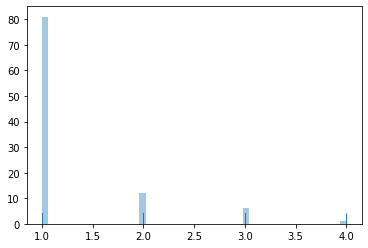

In [39]:
plt.figure()
sns.distplot(a, bins=50, kde=False, rug=True)
#plt.plot(x[:-1], c)
plt.show()

#### Poisson Distribution

In [40]:
a = np.random.poisson(2.5, size=(1500,))

In [41]:
v, x = np.histogram(a, bins=5
                   )    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

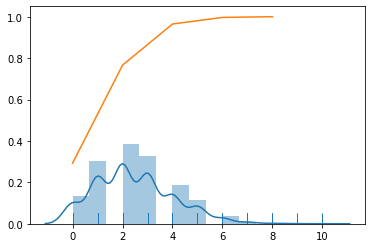

In [42]:
plt.figure()
sns.distplot(a, bins=15, kde=True, rug=True)
plt.plot(x[:-1], c)
plt.show()

## Continuous Distributions

In [43]:
a = np.random.normal(loc=17.0, scale=1., size=(2000,))
b = np.random.normal(loc=17.0, scale=2., size=(2000,))

In [44]:
va, x = np.histogram(a, bins=100)     # histogram  (density)
ca = va.cumsum()/va.sum()             # cumulative (distribution function)

vb, x = np.histogram(b, bins=100)     # histogram  (density)
cb = vb.cumsum()/vb.sum()             # cumulative (distribution function)

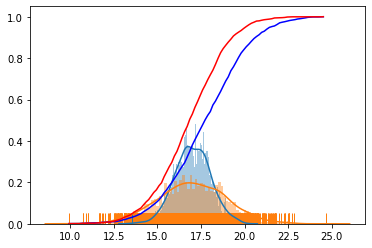

In [45]:
plt.figure()
sns.distplot(a, bins=100, kde=True, rug=True)
sns.distplot(b, bins=100, kde=True, rug=True)
plt.plot(x[:-1], ca, 'b')
plt.plot(x[:-1], cb, 'r')
plt.show()

#### Exponential Distribution

In [46]:
a = np.random.exponential(2.0, size=(2000,))
b = np.random.exponential(5.0, size=(2000,))

In [47]:
va, x = np.histogram(a, bins=100)     # histogram  (density)
ca = va.cumsum()/va.sum()             # cumulative (distribution function)

vb, x = np.histogram(b, bins=100)     # histogram  (density)
cb = vb.cumsum()/vb.sum()             # cumulative (distribution function)

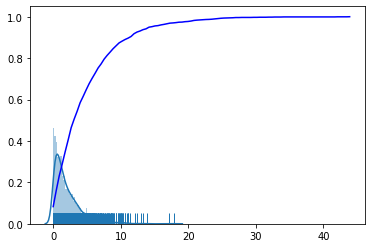

In [48]:
plt.figure()
sns.distplot(a, bins=100, kde=True, rug=True)
#sns.distplot(b, bins=100, kde=True, rug=True)
plt.plot(x[:-1], ca, 'b')
#plt.plot(x[:-1], cb, 'r')
plt.show()

#### Normal, Laplace, Cauchy Distribution

In [49]:
a = np.random.normal(loc=0., scale=2., size=(1000,))
b = np.random.laplace(loc=0., scale=2., size=(1000,))
c = np.random.standard_cauchy(size=(1000,))
d = sp.random.standard_t(10, size=(1000,))

In [50]:
va, x = np.histogram(a, bins=100)     # histogram  (density)
ca = va.cumsum()/va.sum()             # cumulative (distribution function)

vb, x = np.histogram(b, bins=100)     # histogram  (density)
cb = vb.cumsum()/vb.sum()             # cumulative (distribution function)

vc, x = np.histogram(c, bins=100)     # histogram  (density)
cc = vc.cumsum()/vc.sum()             # cumulative (distribution function)

vd, x = np.histogram(d, bins=100)     # histogram  (density)
cd = vd.cumsum()/vd.sum()             # cumulative (distribution function)

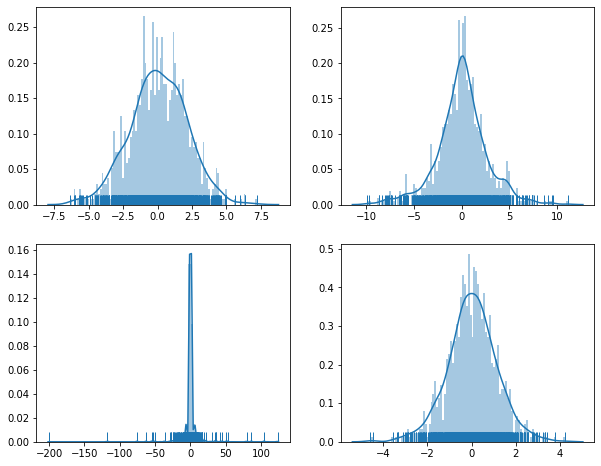

In [51]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(a, bins=100, kde=True, rug=True)
plt.subplot(2,2,2)
sns.distplot(b, bins=100, kde=True, rug=True)
plt.subplot(2,2,3)
sns.distplot(c, bins=100, kde=True, rug=True)
plt.subplot(2,2,4)
sns.distplot(d, bins=100, kde=True, rug=True)
#plt.plot(x[:-1], ca, 'b')
#plt.plot(x[:-1], cb, 'r')
#plt.plot(x[:-1], cc, 'g')
plt.show()

#### Gamma Distribution

In [52]:
a = np.random.gamma(0.9, 0.5, size=(1000,))

In [53]:
v, x = np.histogram(a, bins=40)    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

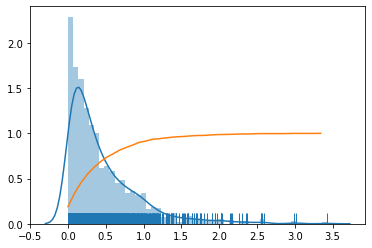

In [54]:
plt.figure()
sns.distplot(a, bins=50, kde=True, rug=True)
plt.plot(x[:-1], c)
plt.show()

#### Beta Distribution

In [55]:
a = np.random.beta(0.5, 0.5, size=(1000,))

In [56]:
v, x = np.histogram(a, bins=40)    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

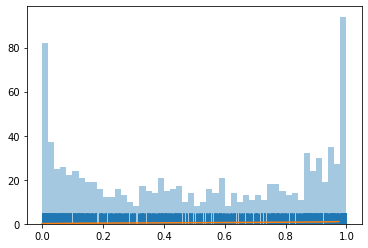

In [57]:
plt.figure()
sns.distplot(a, bins=50, kde=False, rug=True)
plt.plot(x[:-1], c)
plt.show()

#### $\chi^2$ Distribution

In [58]:
a = np.random.chisquare(3, size=(1000,))

In [59]:
v, x = np.histogram(a, bins=40)    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

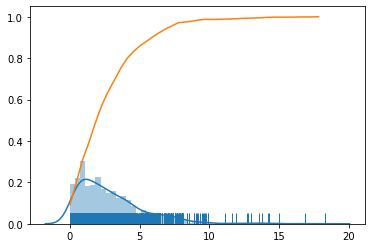

In [60]:
plt.figure()
sns.distplot(a, bins=50, kde=True, rug=True)
plt.plot(x[:-1], c)
plt.show()

#### Log-Normal Distribution

In [61]:
a = np.random.lognormal(0., 0.3, size=(1000,))

In [62]:
v, x = np.histogram(a, bins=40)    # histogram  (density)
c = v.cumsum()/v.sum()             # cumulative (distribution function)

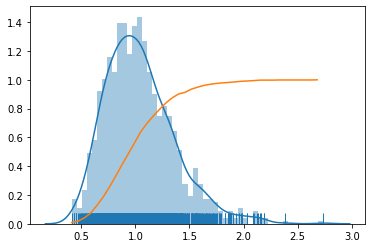

In [63]:
plt.figure()
sns.distplot(a, bins=50, kde=True, rug=True)
plt.plot(x[:-1], c)
plt.show()

## Examples

In the following we will see some examples of distributions in real data.

In [64]:
football = pd.read_csv('understat_per_game.csv')

In [65]:
football.shape

(24580, 29)

In [66]:
football.columns

Index(['league', 'year', 'h_a', 'xG', 'xGA', 'npxG', 'npxGA', 'deep',
       'deep_allowed', 'scored', 'missed', 'xpts', 'result', 'date', 'wins',
       'draws', 'loses', 'pts', 'npxGD', 'ppda_coef', 'ppda_att', 'ppda_def',
       'oppda_coef', 'oppda_att', 'oppda_def', 'team', 'xG_diff', 'xGA_diff',
       'xpts_diff'],
      dtype='object')

In [67]:
football.describe()

,year,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,npxGD,ppda_coef,ppda_att,ppda_def,oppda_coef,oppda_att,oppda_def,xG_diff,xGA_diff,xpts_diff
count,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,...,2.458000e+04,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000,24580.000000
mean,2016.478438,1.309694,1.309694,1.193872,1.193872,5.806957,5.806957,1.341009,1.341009,1.378563,...,-3.694721e-18,10.904386,239.612327,24.349593,10.904386,239.612327,24.349593,-0.031315,-0.031315,0.004723
std,1.699285,0.841109,0.841109,0.774719,0.774719,4.048151,4.048151,1.244176,1.244176,0.823751,...,1.205702e+00,6.163586,83.998463,7.172098,6.163586,83.998463,7.172098,0.951362,0.951362,1.051608
min,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-6.007965e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.943560,-5.943560,-2.965500
25%,2015.000000,0.681165,0.681165,0.621734,0.621734,3.000000,3.000000,0.000000,0.000000,0.673950,...,-7.306208e-01,6.962963,179.000000,19.000000,6.962963,179.000000,19.000000,-0.593431,-0.593431,-0.679800
50%,2016.000000,1.150595,1.150595,1.040425,1.040425,5.000000,5.000000,1.000000,1.000000,1.328900,...,0.000000e+00,9.500000,231.000000,24.000000,9.500000,231.000000,24.000000,0.092995,0.092995,0.093950
75%,2018.000000,1.769455,1.769455,1.597640,1.597640,8.000000,8.000000,2.000000,2.000000,2.051025,...,7.306208e-01,13.095622,290.000000,29.000000,13.095622,290.000000,29.000000,0.588477,0.588477,0.739575
max,2019.000000,6.630490,6.630490,6.610910,6.610910,42.000000,42.000000,10.000000,10.000000,3.000000,...,6.007965e+00,152.000000,764.000000,65.000000,152.000000,764.000000,65.000000,5.063130,5.063130,2.940900


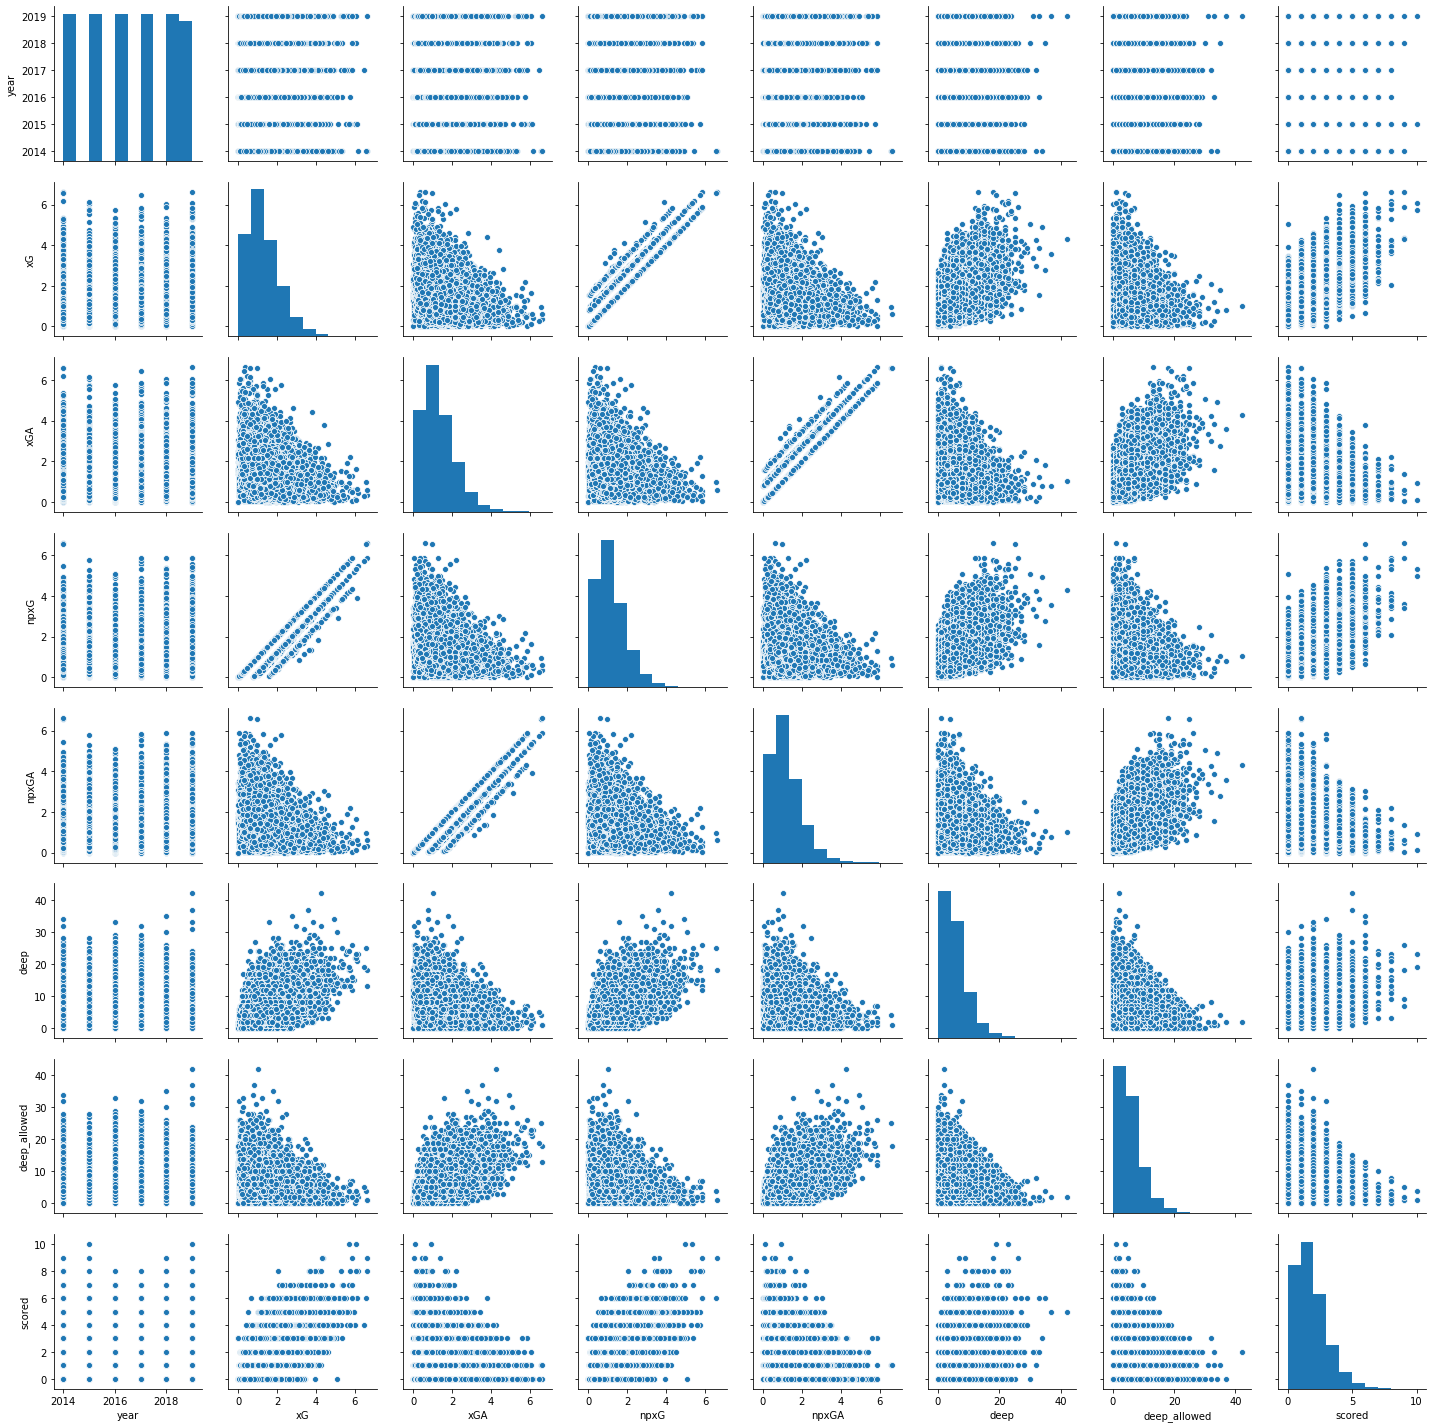

In [68]:
ax = sns.pairplot(data=football.iloc[:,:10])

In [69]:
# xG = expected number of goals (has a Poisson distribution)
goals = football['xG']

In [70]:
goals.mean()

1.3096942471680229

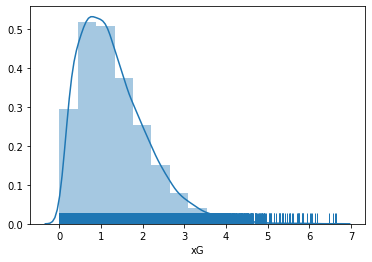

In [71]:
ax = sns.distplot(goals, bins=15, hist=True, kde=True, rug=True)

## Scipy Stats

In [72]:
from scipy import stats

In [73]:
from scipy.stats import norm

In [74]:
dist_continu  = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
dist_discrete = [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_discrete)]

print('number of continuous distributions: %d' % len(dist_continu))
print('number of discrete distributions:   %d' % len(dist_discrete))

number of continuous distributions: 100
number of discrete distributions:   15


In [75]:
print(dist_discrete)

['bernoulli', 'betabinom', 'binom', 'boltzmann', 'dlaplace', 'geom', 'hypergeom', 'logser', 'nbinom', 'planck', 'poisson', 'randint', 'skellam', 'yulesimon', 'zipf']


In [76]:
print(dist_continu)

['alpha', 'anglit', 'arcsine', 'argus', 'beta', 'betaprime', 'bradford', 'burr', 'burr12', 'cauchy', 'chi', 'chi2', 'cosine', 'crystalball', 'dgamma', 'dweibull', 'erlang', 'expon', 'exponnorm', 'exponpow', 'exponweib', 'f', 'fatiguelife', 'fisk', 'foldcauchy', 'foldnorm', 'frechet_l', 'frechet_r', 'gamma', 'gausshyper', 'genexpon', 'genextreme', 'gengamma', 'genhalflogistic', 'geninvgauss', 'genlogistic', 'gennorm', 'genpareto', 'gilbrat', 'gompertz', 'gumbel_l', 'gumbel_r', 'halfcauchy', 'halfgennorm', 'halflogistic', 'halfnorm', 'hypsecant', 'invgamma', 'invgauss', 'invweibull', 'johnsonsb', 'johnsonsu', 'kappa3', 'kappa4', 'ksone', 'kstwobign', 'laplace', 'levy', 'levy_l', 'levy_stable', 'loggamma', 'logistic', 'loglaplace', 'lognorm', 'loguniform', 'lomax', 'maxwell', 'mielke', 'moyal', 'nakagami', 'ncf', 'nct', 'ncx2', 'norm', 'norminvgauss', 'pareto', 'pearson3', 'powerlaw', 'powerlognorm', 'powernorm', 'rayleigh', 'rdist', 'recipinvgauss', 'reciprocal', 'rice', 'semicircular', 

In [77]:
from scipy.stats import norm

In [78]:
x = np.linspace(-20,20,201)

In [79]:
# density function
f1 = norm.pdf(x, loc=0., scale=1.)
f2 = norm.pdf(x, loc=3., scale=2.)

# distribution function
F1 = norm.cdf(x, loc=0., scale=1.)
F2 = norm.cdf(x, loc=3., scale=2.)

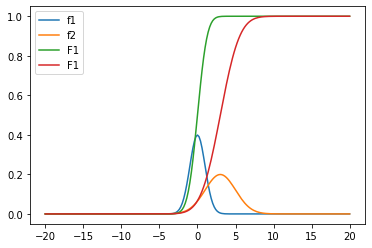

In [80]:
plt.figure()
plt.plot(x,f1, label='f1')
plt.plot(x,f2, label='f2')
plt.plot(x,F1, label='F1')
plt.plot(x,F2, label='F1')
plt.legend()
plt.show()

In [81]:
# función de quantiles
norm.ppf([0.25, 0.5, 0.75])

array([-0.67448975,  0.        ,  0.67448975])

In [82]:
# función de quantiles inversa (cdf)
norm.cdf([-2., -1., 0., 1., 2.])

array([0.02275013, 0.15865525, 0.5       , 0.84134475, 0.97724987])

In [83]:
print(norm.cdf(1) - norm.cdf(-1))
print(norm.cdf(1.5) - norm.cdf(-1.5))
print(norm.cdf(2) - norm.cdf(-2))
print(norm.cdf(2.5) - norm.cdf(-2.5))
print(norm.cdf(3) - norm.cdf(-3))

0.6826894921370859
0.8663855974622838
0.9544997361036416
0.9875806693484477
0.9973002039367398


In [84]:
# generate random sample
a = norm.rvs(size=(100))
a

array([ 2.44899334e-01, -2.48444359e-01, -8.02168712e-01, -1.66989159e-02,
       -1.33498049e-01,  9.28490841e-01, -1.11035426e+00, -1.07184564e-01,
        4.15668153e-01,  7.07266831e-02, -2.21937547e-01,  7.93645756e-01,
       -1.03793821e+00, -1.88490596e+00,  2.34767779e-01,  3.59994527e-01,
        4.72170034e-01,  2.38853558e-01,  1.72839715e+00,  1.25372024e+00,
        4.21431144e-01,  7.61458344e-01, -4.58333937e-01, -2.90719194e+00,
       -7.85167528e-01,  3.77994030e-01, -5.02742020e-01, -2.13000680e-01,
        7.71272318e-01,  1.54437614e+00,  1.33807527e-01,  1.59308010e-01,
        1.11664350e+00, -1.08519836e-01, -2.30727382e+00,  7.21604048e-01,
        1.55936843e+00,  3.46734079e-01,  2.74733688e+00,  2.46576170e-01,
        6.26734762e-01,  1.14322293e+00,  4.50040185e-01,  4.84579784e-01,
        7.93043839e-02,  1.52428047e+00, -1.12979860e+00, -2.21334166e+00,
        1.55442176e+00,  4.23213651e-01,  1.86688051e+00, -1.44684067e+00,
        2.59466349e-01,  

In [85]:
from scipy.stats import cauchy, laplace, norm, t

In [86]:
x = np.linspace(-10,10,201)

In [87]:
# density function
nn = norm.pdf(x, loc=0., scale=2.)
cc = cauchy.pdf(x, loc=0., scale=2.)
ll = laplace.pdf(x, loc=0., scale=2.)
tt = t.pdf(x, df=True)

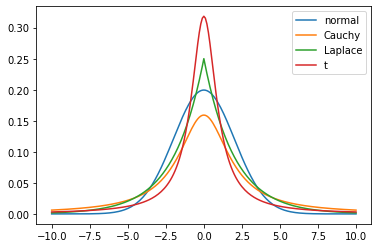

In [88]:
plt.figure()
plt.plot(x, nn, label='normal')
plt.plot(x, cc, label='Cauchy')
plt.plot(x, ll, label='Laplace')
plt.plot(x, tt, label='t')
plt.legend()
plt.show()

In [89]:
from scipy.stats import lognorm

In [90]:
x = np.linspace(0, 10, 201)

In [91]:
ln = lognorm.pdf(x, loc=0., s=0.5)

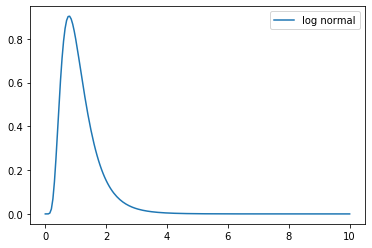

In [92]:
plt.figure()
plt.plot(x, ln, label='log normal')
plt.legend()
plt.show()